<a href="https://colab.research.google.com/github/yuri-sl/Python-OCR/blob/main/C%C3%B3pia_de_OCR_com_Python_e_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR com Python e Tesseract

# Reconhecimento de texto em imagens

## Instalando o Tesseract

Documentação: https://pypi.org/project/pytesseract/

In [ ]:
!pip install Pillow==9.1.0 # necessário após atualização no módulo Pillow carregado pelo Colab
# Após executar, clique no botão [Restart Runtime] que vai aparecer no output dessa célula, logo abaixo. Em seguida, pode continuar executando normalmente o restante do código

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,750 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

## Importando as bibliotecas

In [ ]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow

## Leitura da imagem

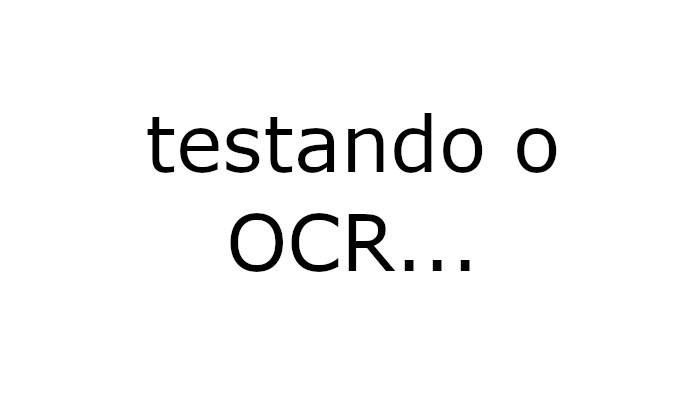

In [ ]:
img = cv2.imread('/content/teste01.jpg')
cv2_imshow(img) # BGR (RGB)

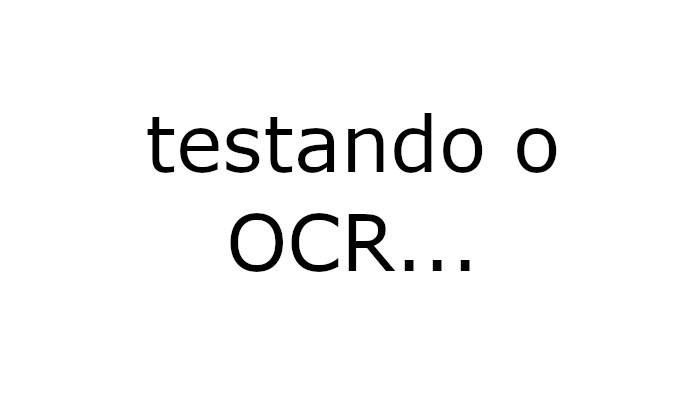

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
texto = pytesseract.image_to_string(rgb)

In [ ]:
print(texto)

testando o
OCR...



## Suporte para caracteres e símbolos de outros idiomas

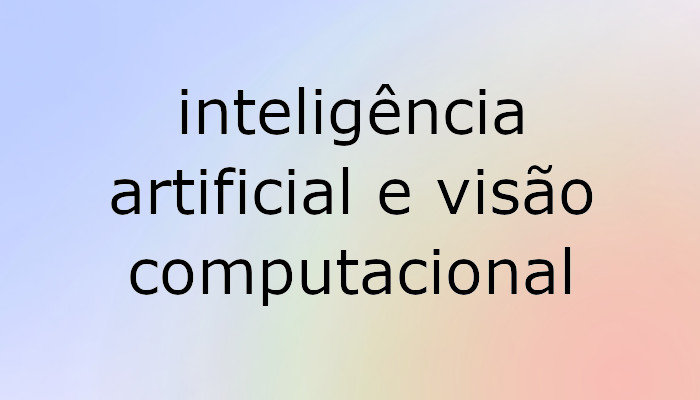

In [ ]:
img = cv2.imread('teste02.jpg')
cv2_imshow(img)

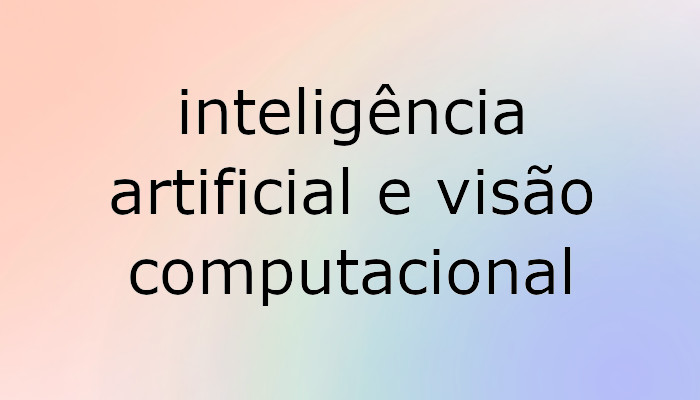

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
texto = pytesseract.image_to_string(rgb)
print(texto) # resumé, fiancé, déjà vu

inteligéncia
artificial e visao
computacional



In [ ]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [ ]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 0s (6,742 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 123677 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [ ]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [ ]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



In [ ]:
!mkdir tessdata

*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-11-27 12:57:38--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2024-11-27 12:57:38--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2024-11-27 12:57:38--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



In [ ]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-11-27 12:57:46--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata [following]
--2024-11-27 12:57:46--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata [following]
--2024-11-27 12:57:46--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.1

In [ ]:
!ls tessdata/

eng.traineddata  por.traineddata


## Parâmetros

### Page segmentation modes (PSM)

In [ ]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


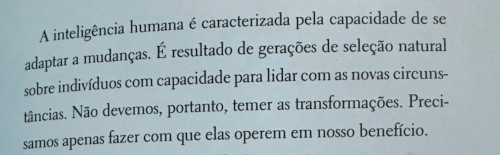

In [ ]:
img = cv2.imread('trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªâªªââ%%ã%ãâêâã%%?ª%%ã



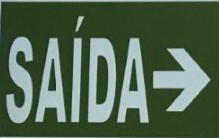

In [ ]:
img = cv2.imread('saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



### Detecção de orientação da página

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

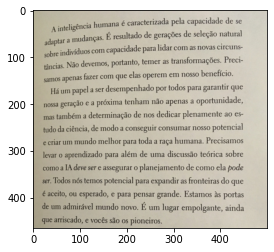

In [ ]:
img = Image.open('livro01.jpg')
plt.imshow(img);

In [ ]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.77
Script: Latin
Script confidence: 13.33



# Seleção dos textos



In [ ]:
from pytesseract import Output

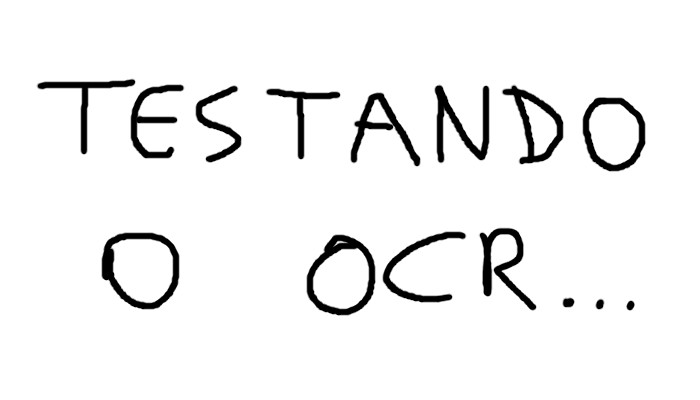

In [ ]:
img = cv2.imread('/content/teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 90, '-1', 74, 66],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...'],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2]}

In [ ]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [ ]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [ ]:
len(resultado['text'])

8

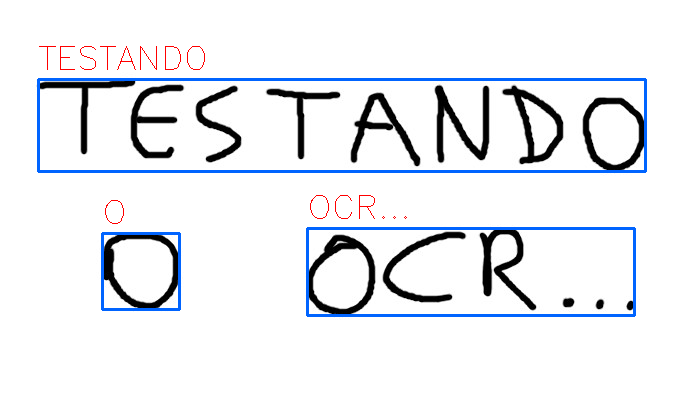

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  #print(i)
  confianca = int(resultado['conf'][i])
  #print(confianca)
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    #print(x, y)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copia)

In [ ]:
img = cv2.imread('teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', 88, 93, 91, '-1', 91],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional'],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1]}

In [ ]:
from PIL import ImageFont, ImageDraw, Image
fonte = '/content/calibri.ttf'

In [ ]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

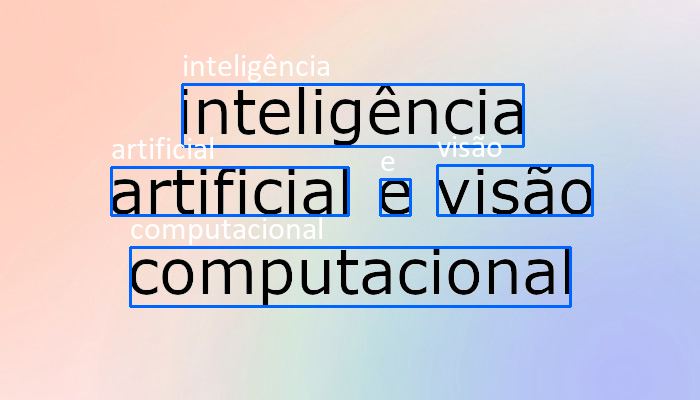

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

# Buscando informações específicas na imagem

In [ ]:
import re # regular expressions

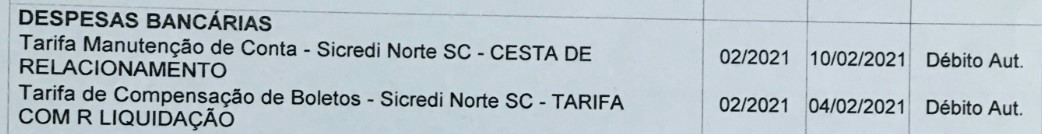

In [ ]:
img = cv2.imread("tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  92,
  92,
  '-1',
  '-1',
  '-1',
  92,
  91,
  91,
  92,
  93,
  92,
  92,
  93,
  94,
  92,
  92,
  91,
  87,
  87,
  87,
  '-1',
  90,
  '-1',
  92,
  92,
  92,
  93,
  92,
  93,
  92,
  91,
  93,
  96,
  92,
  87,
  87,
  77,
  84,
  '-1',
  '-1',
  '-1',
  90,
  93,
  91],
 'height': [134,
  22,
  22,
  22,
  19,
  21,
  82,
  82,
  34,
  17,
  22,
  16,
  16,
  2,
  17,
  16,
  15,
  2,
  16,
  15,
  16,
  15,
  16,
  15,
  20,
  20,
  32,
  17,
  16,
  21,
  16,
  16,
  3,
  16,
  16,
  16,
  2,
  16,
  15,
  16,
  15,
  15,
  23,
  23,
  23,
  16,
  16,
  23],
 'left': [0,
  19,
  19,
  19,
  19,
  147,
  19,
  19,
  19,
  19,
  84,
  211,
  241,
  304,
  318,
  388,
  444,
  478,
  491,

In [ ]:
# https://regexr.com/
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

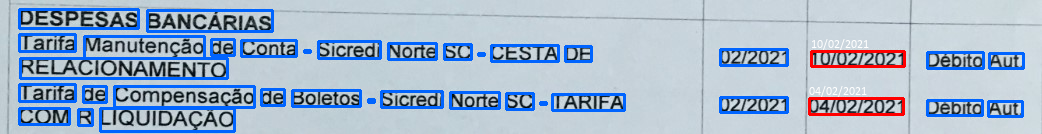

In [ ]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

In [ ]:
datas

['10/02/2021', '04/02/2021']

# Detecção de texto em cenários naturais

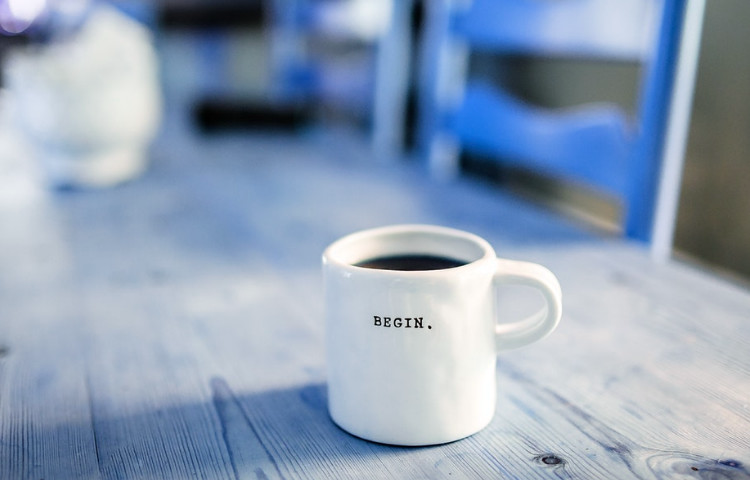

In [ ]:
img = cv2.imread("caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 11"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="eng", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0,
  0,
  0,
  0,
  0,
  374,
  374,
  374,
  374,
  169,
  169,
  169,
  169,
  287,
  287,
  287,
  287,
  360],
 'top': [0,
  0,
  0,
  0,
  25,
  316,
  316,
  316,
  316,
  397,
  397,
  397,
  397,
  404,
  404,
  404,
  444,
  399],
 'width': [750,
  642,
  642,
  642,
  54,
  58,
  58,
  58,
  58,
  69,
  69,
  69,
  69,
  178,
  178,
  178,
  28,
  52],
 'height': [480,
  161,
  161,
  161,
  64,
  13,
  13,
  13,
  13,
  83,
  83,
  83,
  83,
  61,
  61,
  61,
  21,
  77],
 'conf': [-1,
  -1,
  -1,
  -1,
  28,
  -1,
  -1,
  -1,
  86,
  -1,
  -1,
  -1,
  0,
  -1,


In [ ]:
min_conf = 50

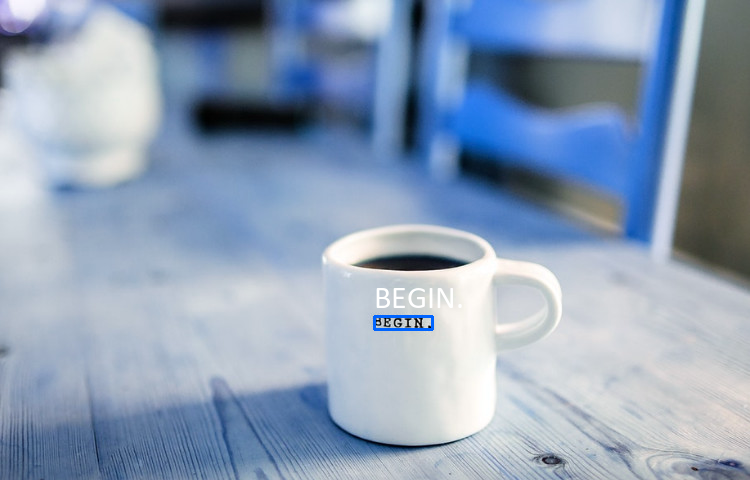

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

In [ ]:
resultado['conf']

[-1, -1, -1, -1, 75, 0, -1, -1, -1, 67, -1, -1, -1, 42, -1, -1, -1, 35]

In [ ]:
resultado['text']

['',
 '',
 '',
 '',
 '"',
 'eniss',
 '',
 '',
 '',
 'BEGIN.',
 '',
 '',
 '',
 'Y',
 '',
 '',
 '',
 '—']